<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo3/blob/master/Clustering_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle,islice

In [0]:
n_samples = 1000

#bases
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=0.9)
blobs = datasets.make_blobs(n_samples=n_samples,cluster_std=1.0,random_state=7)
no_structure = np.random.rand(n_samples,2), None


#print(noisy_circles)
#print(noisy_moons)
#print(blobs)
#print(no_structure)

X,Y = noisy_circles

X = StandardScaler().fit_transform(X) #Normalizar los datos, clusterización trabaja mejor con datos normalizados

k=2

#print(X)
#print(Y)

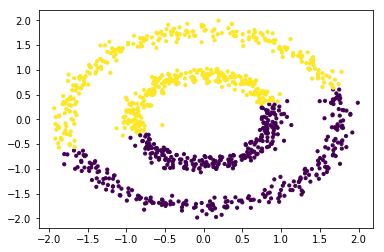

In [0]:
#K means toma formas circulares
k_means = cluster.KMeans(n_clusters=k,random_state=7) #crea el modelo K means 2 cluster (con k=2 - inicializado en la celda de arriba)
y_pred = k_means.fit_predict(X) # se entrena y se hacen las predicciones. Es lo mismo que hacer el fit y después el predict (siempre y cuando sea para los mismos datos)
plt.scatter(X[:,0],X[:,1],s=10,c=y_pred)

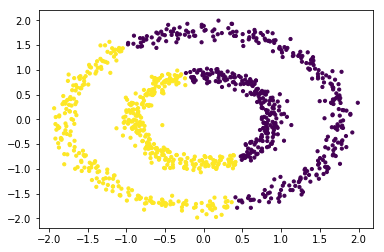

In [0]:
#Método jerarquico aglomerativo

ward = cluster.AgglomerativeClustering(n_clusters=k,linkage='ward')
y_pred_ward = ward.fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=10,c=y_pred_ward)

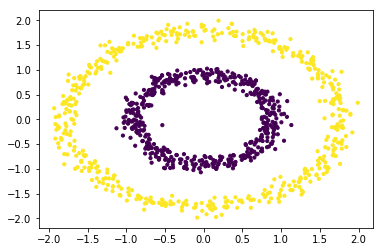

In [0]:
#Método jerarquico - se basa en las distancias pero no con puntos aleatorios como el k means

single = cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
y_pred_single = single.fit_predict(X)
plt.scatter(X[:,0],X[:,1],s=10,c=y_pred_single)

#logra hacer la separación de los dos grupos, divide bien los dos cluster, no es posible hacer con Kmeans

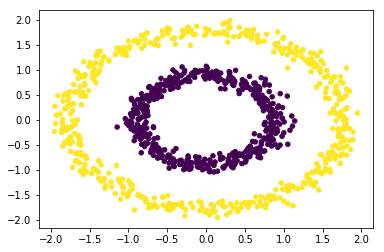

In [0]:
#Clustering basado en densidad

dbscan = cluster.DBSCAN(eps=0.3) #si eps es muy pequeño toma dispersiones muy aglomeradas, si es grande muy general
dbscan.fit(X) #entrenamiento
y_pred_dbscan = dbscan.labels_.astype(np.int) #predicción
plt.scatter(X[:,0],X[:,1],s=20,c=y_pred_dbscan) #s= tamaño de los puntos

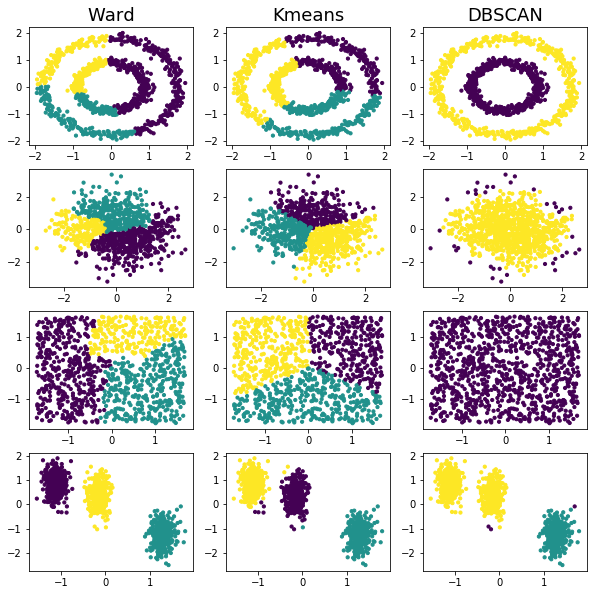

In [0]:
datasets = [noisy_circles, noisy_moons,no_structure,blobs]

index_plot = 1

#k=3

plt.figure(figsize=(10,10))

for i_dataset,dataset in enumerate(datasets):
    
    X,y = dataset
    X = StandardScaler().fit_transform(X) # Normalización
    
    k_means = cluster.KMeans(n_clusters=k) #k means
    ward = cluster.AgglomerativeClustering(n_clusters=k,linkage='ward') #jerarquico
    dbscan = cluster.DBSCAN(eps=0.3) #densidad -epsilon
    
    cluster_methods = (('Ward',ward),('Kmeans',k_means),('DBSCAN',dbscan))
    
    for name,algorithm in cluster_methods:
      algorithm.fit(X)
      if hasattr(algorithm, 'labels_'): #si tiene el atibuto labels debe hacer la prediccion como se muestra
        y_pred = algorithm.labels_.astype(np.int)
      else:
        y_pred = algorithm.predict(X)
      
      plt.subplot(len(datasets),len(cluster_methods),index_plot)
      
      if i_dataset == 0:
        plt.title(name,size=18)
        
      plt.scatter(X[:,0],X[:,1],s=10,c=y_pred)
      index_plot+=1

plt.show()

#depende de la forma el tipo de clustering

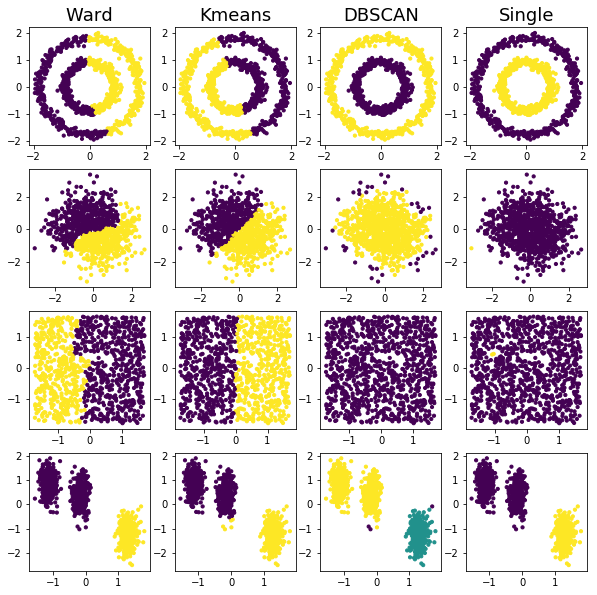

In [0]:
#Depende de la forma para determinar que metodo de clustering usar

datasets = [noisy_circles, noisy_moons,no_structure,blobs]

index_plot = 1

plt.figure(figsize=(10,10))

for i_dataset,dataset in enumerate(datasets):
    
    X,y = dataset
    X = StandardScaler().fit_transform(X) # Normalización
    
    k_means = cluster.KMeans(n_clusters=k) #k means
    ward = cluster.AgglomerativeClustering(n_clusters=k,linkage='ward') #jerarquico
    single = cluster.AgglomerativeClustering(n_clusters=k,linkage='single') #jerarquico
    dbscan = cluster.DBSCAN(eps=0.3) #densidad
    
    cluster_methods = (('Ward',ward),('Kmeans',k_means),('DBSCAN',dbscan),('Single',single))
    
    for name,algorithm in cluster_methods:
      algorithm.fit(X)
      if hasattr(algorithm, 'labels_'): #si tiene el atibuto labels debe hacer la prediccion labels_.astype(np.int) de lo contrario predict(X)
        y_pred = algorithm.labels_.astype(np.int)
      else:
        y_pred = algorithm.predict(X)
      
      plt.subplot(len(datasets),len(cluster_methods),index_plot)
      
      if i_dataset == 0:
        plt.title(name,size=18)
        
      plt.scatter(X[:,0],X[:,1],s=10,c=y_pred)
      index_plot+=1

plt.show()
    

In [0]:
np.int

int

35343223417-ut7mjq7f84st9r5j7esl9uerhfi3qgq9.apps.googleusercontent.com

zx_UN1azczSfSiFRwryPb2VM